In [41]:
import pickle
import pandas as pd

with open('spotify_dataset_new.pkl', 'rb') as f:
    data = pickle.load(f)

In [837]:
data.head()

,acousticness,valence,loudness,mode,key,speechiness,energy,instrumentalness,danceability,id,tempo,liveness,name,artist
0,0.80600,0.601,-16.089,1,2,0.0324,0.198,0.000000,0.507,5mnvqisoDJilY0uCEdT8rG,141.261,0.1020,Danny's Song,Loggins & Messina
1,0.02140,0.505,-8.080,1,5,0.0296,0.673,0.000444,0.542,5sY2beqWPiCRmTyjEkRPPZ,88.039,0.2810,To Find A Friend,Tom Petty
2,0.04570,0.978,-4.906,1,9,0.0320,0.960,0.000000,0.574,2Y90nL1ohB4sgYELDs7uNx,117.486,0.1210,Glory Days,Bruce Springsteen
3,0.22500,0.502,-10.997,1,9,0.0528,0.519,0.000004,0.630,0sDqo9UPzPUtu9wEkI3zRB,143.942,0.0974,The Weight - Remastered,The Band
4,0.00298,0.491,-10.961,1,9,0.0378,0.760,0.029400,0.380,24NwBd5vZ2CK8VOQVnqdxr,99.437,0.1040,Sweet Emotion,Aerosmith


In [815]:
data_reordered = data[['id',
 'name',
 'artist',
 'energy',
 'danceability',
 'acousticness',
 'instrumentalness',
 'mode',
 'liveness',
 'key',
 'tempo',
 'valence',
 'loudness',
 'speechiness']]

In [839]:
data_reordered.head()

,id,name,artist,energy,danceability,acousticness,instrumentalness,mode,liveness,key,tempo,valence,loudness,speechiness
0,5mnvqisoDJilY0uCEdT8rG,Danny's Song,Loggins & Messina,0.198,0.507,0.80600,0.000000,1,0.1020,2,141.261,0.601,-16.089,0.0324
1,5sY2beqWPiCRmTyjEkRPPZ,To Find A Friend,Tom Petty,0.673,0.542,0.02140,0.000444,1,0.2810,5,88.039,0.505,-8.080,0.0296
2,2Y90nL1ohB4sgYELDs7uNx,Glory Days,Bruce Springsteen,0.960,0.574,0.04570,0.000000,1,0.1210,9,117.486,0.978,-4.906,0.0320
3,0sDqo9UPzPUtu9wEkI3zRB,The Weight - Remastered,The Band,0.519,0.630,0.22500,0.000004,1,0.0974,9,143.942,0.502,-10.997,0.0528
4,24NwBd5vZ2CK8VOQVnqdxr,Sweet Emotion,Aerosmith,0.760,0.380,0.00298,0.029400,1,0.1040,9,99.437,0.491,-10.961,0.0378


In [816]:
#track we're searching for
with open('new_searched_track3.pkl', 'rb') as f:
    searched = pickle.load(f)

# cols = searched.columns.tolist()
# cols = cols[-3:] + cols[:11]
# cols
# searched1 = searched[cols]
# searched1
searched_track = searched[['id',
 'name',
 'artist',
 'energy',
 'danceability',
 'acousticness',
 'instrumentalness',
 'mode',
 'liveness',
 'key',
 'tempo',
 'valence',
 'loudness',
 'speechiness']]
searched_track

,id,name,artist,energy,danceability,acousticness,instrumentalness,mode,liveness,key,tempo,valence,loudness,speechiness
0,18qPeqsbJj3nBP7JqIyHJr,Ente Kannil Ninakkaai,Various Artists,0.228,0.658,0.923,0.029,1,0.101,10,134.933,0.31,-13.973,0.0339


In [817]:
#pca example 2
correlation = data_reordered.corr()
correlation.style.background_gradient(cmap='coolwarm')


,energy,danceability,acousticness,instrumentalness,mode,liveness,key,tempo,valence,loudness,speechiness
energy,1.000000,0.311106,-0.791947,-0.447718,-0.067689,0.228919,0.039333,0.250418,0.424055,0.803880,0.138610
danceability,0.311106,1.000000,-0.330823,-0.340426,-0.080429,-0.073679,0.026816,0.007112,0.547238,0.443800,0.197797
acousticness,-0.791947,-0.330823,1.000000,0.419751,0.065747,-0.167539,-0.033514,-0.211367,-0.307314,-0.678517,-0.136080
instrumentalness,-0.447718,-0.340426,0.419751,1.000000,-0.021086,-0.084887,-0.023469,-0.140500,-0.383642,-0.627077,-0.125773
mode,-0.067689,-0.080429,0.065747,-0.021086,1.000000,-0.013341,-0.143667,0.004327,-0.017941,-0.038071,-0.088691
liveness,0.228919,-0.073679,-0.167539,-0.084887,-0.013341,1.000000,0.002180,0.037933,0.021407,0.135344,0.088395
key,0.039333,0.026816,-0.033514,-0.023469,-0.143667,0.002180,1.000000,0.001123,0.030481,0.033246,0.018973
tempo,0.250418,0.007112,-0.211367,-0.140500,0.004327,0.037933,0.001123,1.000000,0.126131,0.235523,0.074261
valence,0.424055,0.547238,-0.307314,-0.383642,-0.017941,0.021407,0.030481,0.126131,1.000000,0.417432,0.093272
loudness,0.803880,0.443800,-0.678517,-0.627077,-0.038071,0.135344,0.033246,0.235523,0.417432,1.000000,0.117156


In [818]:
features = data_reordered.loc[:, 'energy':'speechiness']
cols_to_standardize = features.columns.tolist()

In [819]:
# from sklearn.preprocessing import StandardScaler
# std_audio = StandardScaler().fit_transform(data_reordered[cols_to_standardize]) # normalizing the data

In [845]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_reordered[cols_to_standardize])

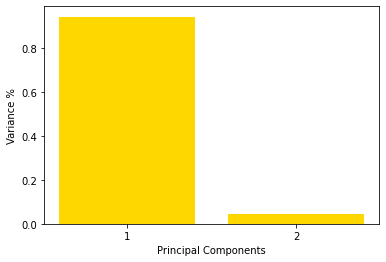

In [846]:
# Plotting the variances for each PC
import matplotlib.pyplot as plt

PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

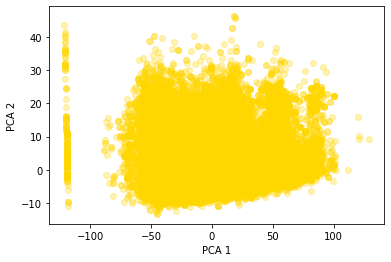

In [822]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='gold')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

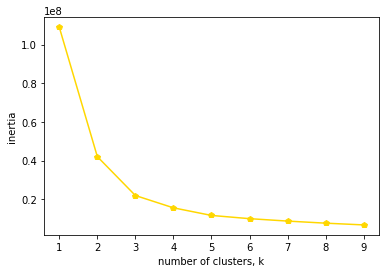

In [823]:
from sklearn.cluster import KMeans

inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
#plt.xticks(k)
plt.show()

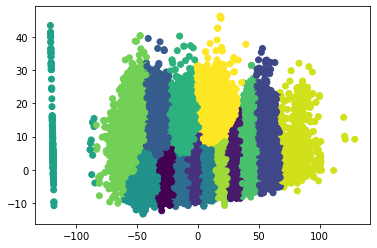

                0          1
0       22.125986   7.862206
1      -30.584420  -3.108995
2       -1.007756  -4.809314
3       25.080249   2.712221
4      -19.357036   0.266734
...           ...        ...
112622 -28.415394  13.608454
112623  17.908513  21.275961
112624 -16.047020  21.855751
112625 -40.455045  26.526805
112626 -31.460706  22.782030

[112627 rows x 2 columns]
[12  0  2 ...  9  4  4]


In [824]:
model = KMeans(n_clusters=15)
model.fit(PCA_components.iloc[:,:2])

# labels = model.predict(PCA_components.iloc[:,:2])
labels = model.predict(PCA_components)
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()
print(PCA_components)
print(labels)

In [825]:
#getting the labels in the new PCA Kmeans df
segm_kmeans = pd.concat([data_reordered.reset_index(drop=True)],axis=1)
#segm_kmeans.columns.values[-11:] = ["Component 1","Component 2","Component 3","Component 4","Component 5","Component 6","Component 7","Component 8","Component 9","Component 10","Component 11"]
segm_kmeans["Segment KMeans PCA"] = model.labels_
# segm_kmeans["Segment"] = segm_kmeans["Segment KMeans PCA"].map({0:"Cluster 1",1:"Cluster 2",2:"Cluster 3",3:"Cluster 4",4:"Cluster 5"})
#segm_kmeans["Segment"] = segm_kmeans["Segment KMeans PCA"].map({0:"Cluster 1",1:"Cluster 2",2:"Cluster 3",3:"Cluster 4",4:"Cluster 5",5:"Cluster 6",6:"Cluster 7",7:"Cluster 8"})

segm_kmeans["Segment"] = segm_kmeans["Segment KMeans PCA"].map({0:"Cluster 1",1:"Cluster 2",2:"Cluster 3",3:"Cluster 4",4:"Cluster 5",5:"Cluster 6",6:"Cluster 7",7:"Cluster 8",8: "Cluster 9",9: "Cluster 10", 10: "Cluster 11", 11: "Cluster 12",12: "Cluster 13", 13: "Cluster 14", 14: "Cluster 15"})

segm_kmeans


,id,name,artist,energy,danceability,acousticness,instrumentalness,mode,liveness,key,tempo,valence,loudness,speechiness,Segment KMeans PCA,Segment
0,5mnvqisoDJilY0uCEdT8rG,Danny's Song,Loggins & Messina,0.19800,0.507,0.806000,0.000000,1,0.1020,2,141.261,0.6010,-16.089,0.0324,12,Cluster 13
1,5sY2beqWPiCRmTyjEkRPPZ,To Find A Friend,Tom Petty,0.67300,0.542,0.021400,0.000444,1,0.2810,5,88.039,0.5050,-8.080,0.0296,0,Cluster 1
2,2Y90nL1ohB4sgYELDs7uNx,Glory Days,Bruce Springsteen,0.96000,0.574,0.045700,0.000000,1,0.1210,9,117.486,0.9780,-4.906,0.0320,2,Cluster 3
3,0sDqo9UPzPUtu9wEkI3zRB,The Weight - Remastered,The Band,0.51900,0.630,0.225000,0.000004,1,0.0974,9,143.942,0.5020,-10.997,0.0528,1,Cluster 2
4,24NwBd5vZ2CK8VOQVnqdxr,Sweet Emotion,Aerosmith,0.76000,0.380,0.002980,0.029400,1,0.1040,9,99.437,0.4910,-10.961,0.0378,5,Cluster 6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112622,6KECEaBJjz7sz6One95awg,Lipgloss Application Pt. 1,Slight Sounds ASMR,0.24500,0.647,0.006510,0.000116,1,0.3240,1,91.101,0.0576,-24.567,0.4960,4,Cluster 5
112623,1WKMPkedR3z44hL8QifjOT,Anticipatory Ear to Ear Whispers Pt.1,Slight Sounds ASMR,0.01010,0.601,0.000684,0.169000,1,0.3090,1,137.771,0.0739,-29.725,0.1730,14,Cluster 15
112624,1ojOiN5E7NArWPkSqzojwT,Anticipatory Ear to Ear Whispers Pt.2,Slight Sounds ASMR,0.00416,0.560,0.002830,0.087700,1,0.1310,1,103.896,0.0893,-32.141,0.1380,9,Cluster 10
112625,01Zuq3xB12zBwqfbPT55r8,Making Your Eyes Heavy,fastASMR,0.13100,0.506,0.197000,0.000734,0,0.2220,10,79.787,0.0367,-38.382,0.0969,4,Cluster 5


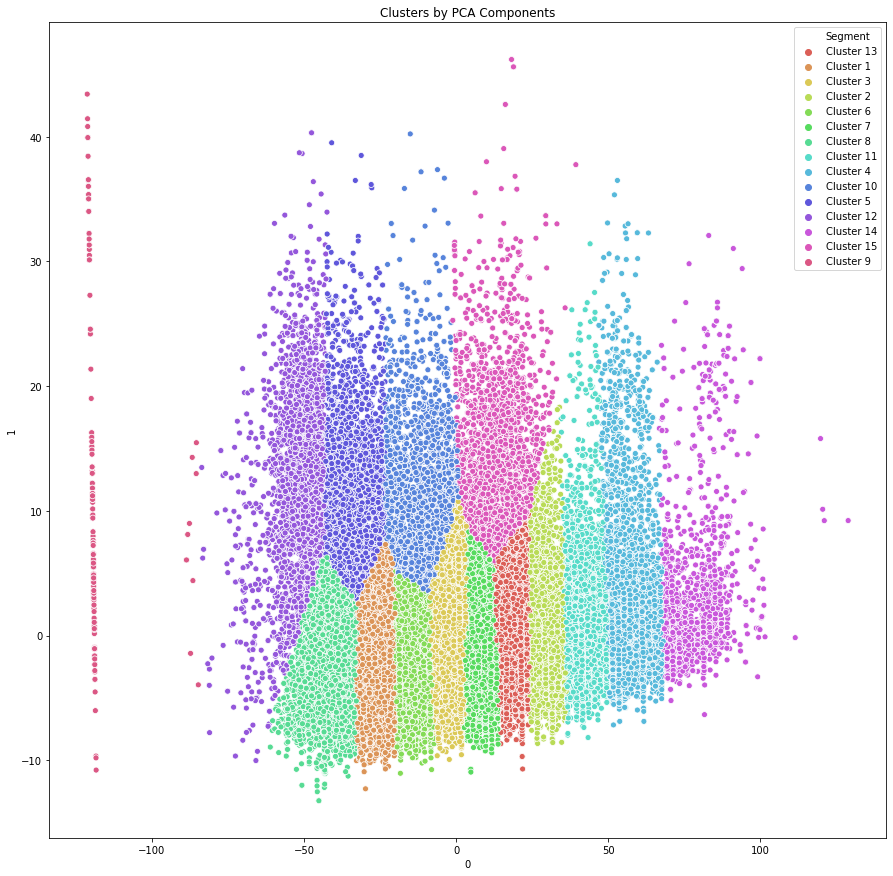

In [826]:
#visualization PCA Kmeans result
%matplotlib inline
import seaborn as sns

x_axis = PCA_components[0]
y_axis = PCA_components[1]
plt.figure(figsize=(15,15))
# sns.scatterplot(x_axis,y_axis,hue = segm_kmeans["Segment"],palette = ['g','r','b','y','m'])
# sns.scatterplot(x_axis,y_axis,hue = segm_kmeans["Segment"],palette = ['g','r',"y",'b','m','c','k','w'])
sns.scatterplot(x_axis,y_axis,hue = segm_kmeans["Segment"],palette = "hls")

plt.title("Clusters by PCA Components")
plt.show()

In [827]:
from sklearn.preprocessing import StandardScaler
# std_audio = StandardScaler().fit_transform(searched_track[cols_to_standardize]) # normalizing the data
# pca = PCA(n_components=1)
principleComponents = pca.transform(searched_track[cols_to_standardize])
PCA_components = pd.DataFrame(principleComponents)
# print(model.predict(PCA_components.iloc[:,:2]))
print(model.predict(PCA_components))
PCA_components

[12]


,0,1
0,15.921808,5.202112


In [849]:
x = segm_kmeans[segm_kmeans["Segment KMeans PCA"] == 8]
y = x.iloc[:, : 3].sample(n=30)
y.reset_index()
# x.iloc[:, : 3]

,index,id,name,artist
0,26133,5pGBDKBaR63vuJ4g8ialcU,Deep Sleep Recovery Noise,White Noise Spa
1,105459,5WG22XDxMdU2dmnJ3CuVhQ,Chill Waves,Factorial FX
2,50974,3esjIHZ9WHch6GWLNSDJky,Panning Repeating Beat,BBVB
3,89799,5aVTpbRU7DM9GfCNydb9MR,Rain in the Park,Various Artists
4,50931,7iLQ7XCM0TGm1Ebch0fjdS,Pink Noise - 2300 Hz Hi-cut,89 Degrees
5,97513,3sAYxq1986j3ydqLv6jwUJ,"Serenade for Strings in E Major, Op. 22, B. 52...",Antonín Dvořák
6,51482,26G9IW1wfeC1n5DIW8IM5E,Rain in Autumn,Natural Woodland Sounds
7,83900,5oXlgW24ELS0P5YkAQcrko,Small Memory,Jon Hopkins
8,89829,0tK5Zvy4HttHXp9ldVm0EV,Deep Rain,The Rain Library
9,26180,278bBDuWFKOfTYiSDV06jv,Pink Noise Warm Analogue Tone,Chill Machine
